In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data = pd.read_excel("https://github.com/yjiu99/FuzzyLogic/blob/main/insullin.xlsx?raw=true")
data

,id,carbohydrate,blood
0,1,19,6
1,2,18,9
2,3,14,8
3,4,5,10
4,5,6,6
...,...,...,...
95,96,3,10
96,97,11,6
97,98,13,5
98,99,14,10


In [65]:
def lowCarbohydrate(f):
    lowCarbohydrate, notlowCarbohydrate = 10,12
    
    if f <= lowCarbohydrate:
        return 1
    elif f > notlowCarbohydrate:
        return 0
    elif f > lowCarbohydrate and f <= notlowCarbohydrate:
        return ((notlowCarbohydrate - f) / (notlowCarbohydrate - lowCarbohydrate))
    
def mediumCarbohydrate(f):
    notmediumCarbohydrate1, mediumCarbohydrate1, mediumCarbohydrate2, notmediumCarbohydrate2 = 10,12,16,18
    if f > mediumCarbohydrate1 and f <= mediumCarbohydrate2:
        return 1
    elif f <= notmediumCarbohydrate1 or f > notmediumCarbohydrate2:
        return 0
    elif f > notmediumCarbohydrate1 and f <= mediumCarbohydrate1:
        return ((f-notmediumCarbohydrate1) / (mediumCarbohydrate1 - notmediumCarbohydrate1))
    elif f > mediumCarbohydrate2 and f <= notmediumCarbohydrate2:
        return ((notmediumCarbohydrate2 - f) / (notmediumCarbohydrate2 - mediumCarbohydrate2))
    
def highCarbohydrate(f):
    nothighCarbohydrate, highCarbohydrate = 16,18
    
    if f > highCarbohydrate:
        return 1
    elif f <= nothighCarbohydrate:
        return 0
    elif f > nothighCarbohydrate and f <= highCarbohydrate:
        return ((f - nothighCarbohydrate) / (highCarbohydrate - nothighCarbohydrate))

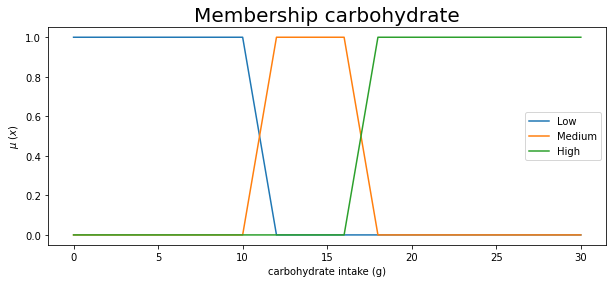

In [66]:
# 탄수화물 섭취량 그래프로 그리기
x = [ i for i in range(31)]
    
ylowC = [lowCarbohydrate(i) for i in x]
ymediumC = [mediumCarbohydrate(i) for i in x]
yhighC = [highCarbohydrate(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership carbohydrate',fontsize = 20)
plt.plot(x, ylowC, label = 'Low')
plt.plot(x, ymediumC, label = 'Medium')
plt.plot(x, yhighC, label = 'High')
plt.xlabel('carbohydrate intake (g)')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [67]:
def lowBlood(x):
    lowBlood , notlowBlood = 6,7
    
    if x <= lowBlood:
        return 1;
    elif x > notlowBlood:
        return 0
    elif x > lowBlood and x <= notlowBlood:
        return ((notlowBlood - x) / (notlowBlood - lowBlood))
    
def mediumBlood(x):
    notmediumBlood1, mediumBlood, notmediumBlood2 = 6,7,8
    
    if x == mediumBlood:
        return 1
    elif x <= notmediumBlood1 and x > notmediumBlood2:
        return 0
    elif x >= notmediumBlood1 and x < mediumBlood:
        return (x - notmediumBlood1) / ( mediumBlood- notmediumBlood1)
    elif x > mediumBlood and x <= notmediumBlood2:
        return ((notmediumBlood2 - x) / (notmediumBlood2 - mediumBlood))
    
def highBlood(x):
    nothighBlood, highBlood = 7,8
    
    if x > highBlood:
        return 1
    elif x <= nothighBlood:
        return 0
    elif x > nothighBlood and x <= highBlood:
        return ((x - nothighBlood) / (highBlood - nothighBlood))

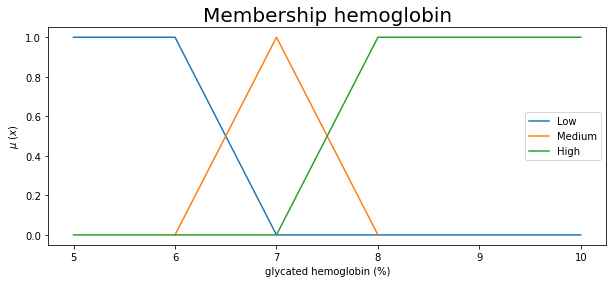

In [68]:
#당화혈색소 소속함수

x = [i for i in range(5,11)]

ylowB = [lowBlood(i) for i in x]
ymediumB = [mediumBlood(i) for i in x]
yhighB = [highBlood(i) for i in x]
plt.figure(figsize=(10,4))
plt.title('Membership hemoglobin',fontsize = 20) 
plt.plot(x, ylowB, label = 'Low')
plt.plot(x, ymediumB, label = 'Medium')
plt.plot(x, yhighB, label = 'High')
plt.xlabel('glycated hemoglobin (%)')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()


In [69]:
#FUZZIFICATION

def fuzzificationCarbohydrate(carbohydrateValue):
  carbohydrateSet = []
  carbohydrateSet.append(lowCarbohydrate(carbohydrateValue))
  carbohydrateSet.append(mediumCarbohydrate(carbohydrateValue))
  carbohydrateSet.append(highCarbohydrate(carbohydrateValue))
  return carbohydrateSet

def fuzzificationBlood(bloodValue):
  bloodSet = []
  bloodSet.append(lowBlood(bloodValue))
  bloodSet.append(mediumBlood(bloodValue))
  bloodSet.append(highBlood(bloodValue))
  return bloodSet

In [73]:
#INFERENCE

def inference(carbohydrateSet, bloodSet):
    inferenceSet = []
    verylowSet, lowSet, mediumSet, highSet, veryhighSet = [], [], [], [],[]

    verylowSet.append(bloodSet[0])
    verylowSet.append(min(carbohydrateSet[0], bloodSet[1]))
    
    lowSet.append(min(carbohydrateSet[1], bloodSet[1]))
    
    mediumSet.append(min(carbohydrateSet[0], bloodSet[2]))
    mediumSet.append(min(carbohydrateSet[1], bloodSet[2]))
    
    highSet.append(min(carbohydrateSet[2], bloodSet[1]))
    
    veryhighSet.append(min(carbohydrateSet[2], bloodSet[2]))
    
    inferenceSet.append(max(verylowSet))
    inferenceSet.append(max(lowSet))
    inferenceSet.append(max(mediumSet))
    inferenceSet.append(max(highSet))
    inferenceSet.append(max(veryhighSet))
    
    return inferenceSet

In [74]:
#DEFUZZIFICATION

def defuzzification(inferenceSet):
    multiplier = (inferenceSet[0]*10) + (inferenceSet[1]*20) + (inferenceSet[2]*30) + (inferenceSet[3]*40) + (inferenceSet[4]*50)
    divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2] + inferenceSet[3] + inferenceSet[4]
    return multiplier/divider

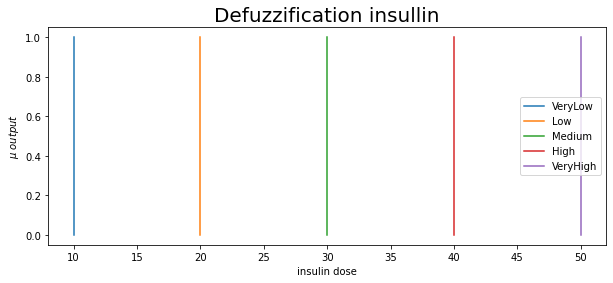

In [75]:
xVerylow = [10,10]
xLow = [20,20]
xMedium = [30,30]
xHigh = [40,40]
xVeryHigh = [50,50]

y = [0,1]

plt.figure(figsize=(10,4))
plt.title('Defuzzification insullin',fontsize = 20)
plt.plot(xVerylow,y,label='VeryLow')
plt.plot(xLow,y,label='Low')
plt.plot(xMedium,y,label='Medium')
plt.plot(xHigh,y,label='High')
plt.plot(xVeryHigh,y,label='VeryHigh')
plt.xlabel('insulin dose')
plt.ylabel(r'$\mu\ output$')
plt.legend()

In [76]:
#계산
insulinDose = []
for row in range(100):
    fuzziCarbohydrate = fuzzificationCarbohydrate(data['carbohydrate'][row])
    fuzziBlood = fuzzificationBlood(data['blood'][row])
    inferensi = inference(fuzziCarbohydrate,fuzziBlood)
    insulinDose.extend([defuzzification(inferensi)])

    
# 엑셀에 값 저장
data['insulin'] = insulinDose
data = data.sort_values(by='insulin', ascending=False)[:10] 
data['id'].to_excel('InsulinFuzzyResult.xls', index=False, header=False)

data

TypeError: '<' not supported between instances of 'NoneType' and 'int'